In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "bV1ZWR3eugtfZjTPWpza4AUdD"
consumer_secret = "5ZUXJdzBfESNZYJdELyMfJyln7GSh1Xhe0k8pH7mbLCVdocoIH"
access_token = "710194348990795776-wHhDWFHsRLPIdw3pt46Ol7wTiLdjkwT"
access_token_secret = "1DPPul1CPwvlCiC8dlBaeSFbEW6UqGbOQnXEe1elpLIOD"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [6]:
target_user = "@Tesla"

counter = 1

Sentiments = []

for x in range(5):
    
    public_tweets = api.user_timeline(target_user)

    for tweet in public_tweets:
    
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        Sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        
        counter = counter + 1

In [9]:
sentiments_pd = pd.DataFrame.from_dict(Sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.2500,Fri Jan 05 02:09:58 +0000 2018,0.882,0.118,0.000,1
1,-0.3400,Wed Jan 03 17:06:00 +0000 2018,0.676,0.324,0.000,2
2,0.2960,Wed Jan 03 02:31:58 +0000 2018,0.645,0.000,0.355,3
3,0.6486,Tue Dec 26 17:47:57 +0000 2017,0.813,0.000,0.187,4
4,-0.4782,Sun Dec 24 00:08:24 +0000 2017,0.889,0.111,0.000,5


In [14]:
print(sentiments_pd)
print("Compound Score: %s" % compound)
print("Positive Score: %s" % pos)
print("Neutral Score: %s" % neu)
print("Negative Score: %s" % neg)
print("")

    Compound                            Date  Negative  Neutral  Positive  \
0    -0.2500  Fri Jan 05 02:09:58 +0000 2018     0.882    0.118     0.000   
1    -0.3400  Wed Jan 03 17:06:00 +0000 2018     0.676    0.324     0.000   
2     0.2960  Wed Jan 03 02:31:58 +0000 2018     0.645    0.000     0.355   
3     0.6486  Tue Dec 26 17:47:57 +0000 2017     0.813    0.000     0.187   
4    -0.4782  Sun Dec 24 00:08:24 +0000 2017     0.889    0.111     0.000   
5     0.7717  Sat Dec 23 00:16:33 +0000 2017     0.749    0.000     0.251   
6     0.0000  Fri Dec 22 22:14:28 +0000 2017     1.000    0.000     0.000   
7     0.7351  Thu Dec 21 19:06:43 +0000 2017     0.659    0.000     0.341   
8     0.0000  Tue Dec 19 19:20:02 +0000 2017     1.000    0.000     0.000   
9     0.3612  Fri Dec 15 04:11:33 +0000 2017     0.545    0.000     0.455   
10    0.7425  Thu Dec 14 21:12:58 +0000 2017     0.769    0.000     0.231   
11    0.0000  Mon Dec 11 18:54:07 +0000 2017     1.000    0.000     0.000   

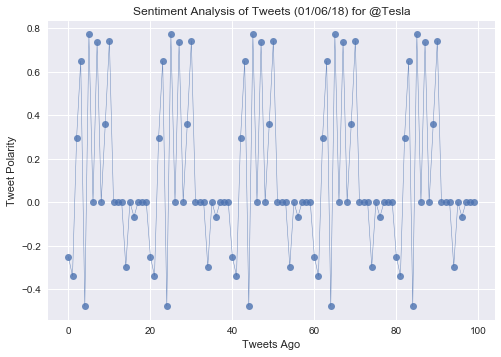

In [10]:
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()